# Example: Extracting channels

This uses the Channel template to find channel network by matching high-curvature landforms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scarplet as sl
from scarplet.WindowedTemplate import Channel

This is example is an SRTM tile including part the Grand Cnayon.

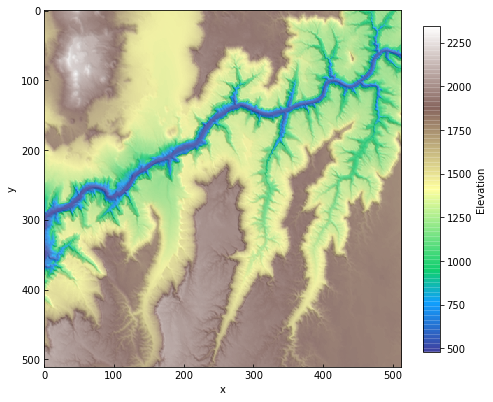

In [3]:
data = sl.load('data/grandcanyon.tif')
data.plot(color=True, figsize=(8,8))

In [ ]:
params = {'scale': 5,
          'age': 1.,
          'ang_min': -np.pi / 2,
          'ang_max': np.pi / 2
         }

res = sl.match(data, Channel, **params)

In [ ]:
sl.plot_results(data, res, figsize=(8,8))